# Week 2
### Data preprocessing for ML applications

During this class we will cover several basic steps of data treatment and preprocessing in order to use it for future Machine Learning models:

1. Choosing and retrieving the dataset
2. Importing the libraries
3. Importing the dataset
4. Finding and treating missing data
5. Encoding categorical data
6. Feature scaling
7. Feature selection and dimentionality reduction
8. Splitting the dataset: training, validation, and testing

### Choosing and retrieving the dataset

Since every ML model requires data to learn and its performance highly depends on the training process, it is crucially important to select appropriate information to feed the model into.

For any particular task there might be two distinct approaches for data acquisition:
* Find an existing dataset with appropriate samples
* Create a new dataset from scratch (recordings, polls, data mining, etc.)
    
Important features of datasets:
* Size (How to determine a sufficient number of samples?)
* Cleanliness (How many missing values?)
* Homogeneity (Are the samples appropriate and correspond to the task?)
* Number of features (Is it good to have too many features? Too few?)
    
Data sources:
*  Kaggle
*  Google Dataset Search
*  Datahub.io
*  Subject specific websites and services (e.g., CERN Open Data, NASA Earth Data, etc.)

### Importing the libraries

There is a handful of useful libraries in Python that provide an easy way to treat data in a fast and efficient manner. Some popular examples:
* Numpy
* Pandas
* Scikit-learn
* Tensorflow / Keras
* Pytorch
* Jax

In [160]:
import pandas as pd
import numpy as np
import sklearn

### Importing the dataset

In [161]:
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

### Finding and treating missing data

Some samples within a dataset may have incomplete information: some or all the features might be missing. The training process cannot be executed with such missing pieces. Thus, before proceeding to the leaning, one must deal with missing data. There are several strategies that one can think of:
* Removing entries with missing features
* Removing features that are absent in too many samples
* Imputation: filling out the missing fields:
    * with the most common value
    * with the mean/median of all samples
    * with more complex strategies, e.g, Linear Regression, KNN
    * using some prior knowledge

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [163]:
data.drop(labels=['PassengerId', 'Ticket'], axis=1, inplace=True)

In [164]:
# The "embarked" feature

# Let's check enrties with NaN

data[data['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,B28,NaN


In [165]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [166]:
data['Embarked'].fillna('S', inplace=True)
print(data)

     Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch     Fare Cabin Embarked  
0      male  22.0      1     

In [167]:
data['Age'].median()

28.0

In [168]:
from sklearn.impute import SimpleImputer

fea_transformer = SimpleImputer(strategy="median")
values = fea_transformer.fit_transform(data[["Age"]])
print(pd.DataFrame(values))

        0
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
..    ...
886  27.0
887  19.0
888  28.0
889  26.0
890  32.0

[891 rows x 1 columns]


In [169]:
# KNN imputation (Later on in the code)

# from sklearn.impute import KNNImputer

# fea_transformer = KNNImputer(n_neighbors=3)
# data["Age"] = fea_transformer.fit_transform(data[["Age"]]).astype(float)
# print(data)

In [170]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB
None


### Encoding categorical data

Some features in a dataset might be represented as values in a discrete set of categories (e.g., 'Sex', 'Embarked')
In order to process such features one has to encode them in order to convert a categorical set (usually, strings) into a set of numerical values.

In [171]:
pd.get_dummies(data, columns = ['Embarked']).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,0,0,1


In [172]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Embarked'] = le.fit_transform(data['Embarked'])
print(data)

     Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch     Fare Cabin  Embarked  
0      male  22.0      1    

In [173]:
data['Sex'] = le.fit_transform(data['Sex'])
print(data)

     Survived  Pclass                                               Name  Sex  \
0           0       3                            Braund, Mr. Owen Harris    1   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   
2           1       3                             Heikkinen, Miss. Laina    0   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   
4           0       3                           Allen, Mr. William Henry    1   
..        ...     ...                                                ...  ...   
886         0       2                              Montvila, Rev. Juozas    1   
887         1       1                       Graham, Miss. Margaret Edith    0   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"    0   
889         1       1                              Behr, Mr. Karl Howell    1   
890         0       3                                Dooley, Mr. Patrick    1   

      Age  SibSp  Parch    

In [174]:
def cabin_replace(cabin):
  cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G']
  for substring in cabin_list:
    if substring in str(cabin):
      return substring
  return np.nan

data['Cabin'] = data['Cabin'].apply(cabin_replace)
print(data)

     Survived  Pclass                                               Name  Sex  \
0           0       3                            Braund, Mr. Owen Harris    1   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   
2           1       3                             Heikkinen, Miss. Laina    0   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   
4           0       3                           Allen, Mr. William Henry    1   
..        ...     ...                                                ...  ...   
886         0       2                              Montvila, Rev. Juozas    1   
887         1       1                       Graham, Miss. Margaret Edith    0   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"    0   
889         1       1                              Behr, Mr. Karl Howell    1   
890         0       3                                Dooley, Mr. Patrick    1   

      Age  SibSp  Parch    

In [175]:
data['Cabin'] = le.fit_transform(data['Cabin'])
print(data)

     Survived  Pclass                                               Name  Sex  \
0           0       3                            Braund, Mr. Owen Harris    1   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   
2           1       3                             Heikkinen, Miss. Laina    0   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   
4           0       3                           Allen, Mr. William Henry    1   
..        ...     ...                                                ...  ...   
886         0       2                              Montvila, Rev. Juozas    1   
887         1       1                       Graham, Miss. Margaret Edith    0   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"    0   
889         1       1                              Behr, Mr. Karl Howell    1   
890         0       3                                Dooley, Mr. Patrick    1   

      Age  SibSp  Parch    

In [176]:
def get_title(string):
    import re
    regex = re.compile(r'Mr|Don|Major|Capt|Jonkheer|Rev|Col|Dr|Mrs|Countess|Dona|Mme|Ms|Miss|Mlle|Master', re.IGNORECASE)
    results = regex.search(string)
    if results != None:
        return(results.group().lower())
    else:
        return np.nan

data['Name'] = data['Name'].apply(get_title)
data['Name'] = le.fit_transform(data['Name'])
print(data)

     Survived  Pclass  Name  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0           0       3    11    1  22.0      1      0   7.2500      8         2
1           1       1    11    0  38.0      1      0  71.2833      2         0
2           1       3     8    0  26.0      0      0   7.9250      8         2
3           1       1    11    0  35.0      1      0  53.1000      2         2
4           0       3    11    1  35.0      0      0   8.0500      8         2
..        ...     ...   ...  ...   ...    ...    ...      ...    ...       ...
886         0       2    13    1  27.0      0      0  13.0000      8         2
887         1       1     8    0  19.0      0      0  30.0000      1         2
888         0       3     8    0   NaN      1      2  23.4500      8         2
889         1       1    11    1  26.0      0      0  30.0000      2         0
890         0       3    11    1  32.0      0      0   7.7500      8         1

[891 rows x 10 columns]


In [177]:
#Going back to filling out the missing data with KNNImputer
from sklearn.impute import KNNImputer

fea_transformer = KNNImputer(n_neighbors=3)
data["Age"] = fea_transformer.fit_transform(data[["Age"]]).astype(float)
print(data)

     Survived  Pclass  Name  Sex        Age  SibSp  Parch     Fare  Cabin  \
0           0       3    11    1  22.000000      1      0   7.2500      8   
1           1       1    11    0  38.000000      1      0  71.2833      2   
2           1       3     8    0  26.000000      0      0   7.9250      8   
3           1       1    11    0  35.000000      1      0  53.1000      2   
4           0       3    11    1  35.000000      0      0   8.0500      8   
..        ...     ...   ...  ...        ...    ...    ...      ...    ...   
886         0       2    13    1  27.000000      0      0  13.0000      8   
887         1       1     8    0  19.000000      0      0  30.0000      1   
888         0       3     8    0  29.699118      1      2  23.4500      8   
889         1       1    11    1  26.000000      0      0  30.0000      2   
890         0       3    11    1  32.000000      0      0   7.7500      8   

     Embarked  
0           2  
1           0  
2           2  
3          

### Feature scaling

* Standartization

In [178]:
print((data-data.mean())/data.std())

     Survived    Pclass      Name       Sex       Age     SibSp     Parch  \
0   -0.788829  0.826913  0.535093  0.737281 -0.592148  0.432550 -0.473408   
1    1.266279 -1.565228  0.535093 -1.354813  0.638430  0.432550 -0.473408   
2    1.266279  0.826913 -0.931884 -1.354813 -0.284503 -0.474279 -0.473408   
3    1.266279 -1.565228  0.535093 -1.354813  0.407697  0.432550 -0.473408   
4   -0.788829  0.826913  0.535093  0.737281  0.407697 -0.474279 -0.473408   
..        ...       ...       ...       ...       ...       ...       ...   
886 -0.788829 -0.369158  1.513077  0.737281 -0.207592 -0.474279 -0.473408   
887  1.266279 -1.565228 -0.931884 -1.354813 -0.822881 -0.474279 -0.473408   
888 -0.788829  0.826913 -0.931884 -1.354813  0.000000  0.432550  2.007806   
889  1.266279 -1.565228  0.535093  0.737281 -0.284503 -0.474279 -0.473408   
890 -0.788829  0.826913  0.535093  0.737281  0.176964 -0.474279 -0.473408   

         Fare     Cabin  Embarked  
0   -0.502163  0.522016  0.585625  
1  

* Normalization

In [179]:
print((data-data.min())/(data.max()-data.min()))

     Survived  Pclass      Name  Sex       Age  SibSp     Parch      Fare  \
0         0.0     1.0  0.846154  1.0  0.271174  0.125  0.000000  0.014151   
1         1.0     0.0  0.846154  0.0  0.472229  0.125  0.000000  0.139136   
2         1.0     1.0  0.615385  0.0  0.321438  0.000  0.000000  0.015469   
3         1.0     0.0  0.846154  0.0  0.434531  0.125  0.000000  0.103644   
4         0.0     1.0  0.846154  1.0  0.434531  0.000  0.000000  0.015713   
..        ...     ...       ...  ...       ...    ...       ...       ...   
886       0.0     0.5  1.000000  1.0  0.334004  0.000  0.000000  0.025374   
887       1.0     0.0  0.615385  0.0  0.233476  0.000  0.000000  0.058556   
888       0.0     1.0  0.615385  0.0  0.367921  0.125  0.333333  0.045771   
889       1.0     0.0  0.846154  1.0  0.321438  0.000  0.000000  0.058556   
890       0.0     1.0  0.846154  1.0  0.396833  0.000  0.000000  0.015127   

     Cabin  Embarked  
0    1.000       1.0  
1    0.250       0.0  
2    1

In the following example we will proceed with the standartization:

In [180]:
data = (data - data.mean()) / data.std()

### Feature selection and dimentionality reduction

          Survived    Pclass      Name       Sex       Age     SibSp  \
Survived  1.000000 -0.338481 -0.247007 -0.543351 -0.069809 -0.035322   
Pclass   -0.338481  1.000000  0.082096  0.131900 -0.331339  0.083081   
Name     -0.247007  0.082096  1.000000  0.314259  0.206253 -0.171926   
Sex      -0.543351  0.131900  0.314259  1.000000  0.084153 -0.114631   
Age      -0.069809 -0.331339  0.206253  0.084153  1.000000 -0.232625   
SibSp    -0.035322  0.083081 -0.171926 -0.114631 -0.232625  1.000000   
Parch     0.081629  0.018443 -0.134244 -0.245489 -0.179191  0.414838   
Fare      0.257307 -0.549500 -0.079902 -0.182333  0.091566  0.159651   
Cabin    -0.301570  0.745932  0.079690  0.123644 -0.249032  0.041325   
Embarked -0.167675  0.162098  0.073625  0.108262 -0.026749  0.068230   

             Parch      Fare     Cabin  Embarked  
Survived  0.081629  0.257307 -0.301570 -0.167675  
Pclass    0.018443 -0.549500  0.745932  0.162098  
Name     -0.134244 -0.079902  0.079690  0.073625  
Sex

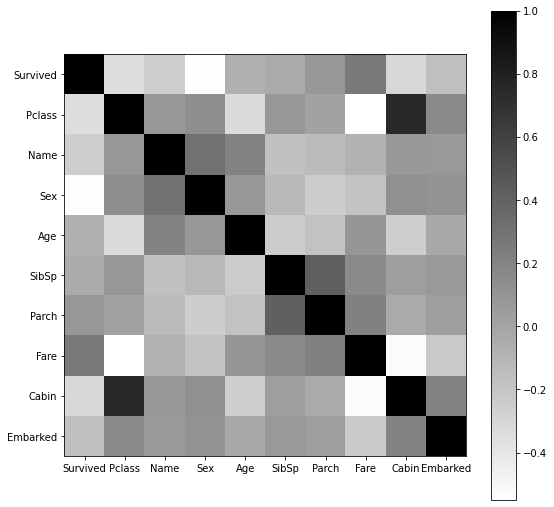

In [181]:
import matplotlib.pyplot as plt

a = data.corr()
print(a)
fig, ax = plt.subplots(figsize=(9, 9))
heatmap = ax.imshow(a, cmap='gray_r', interpolation='nearest')
ax.set_yticks(range(len(a.index.values)))
ax.set_yticklabels(a.index.values)
ax.set_xticks(range(len(a.index.values)))
ax.set_xticklabels(a.index.values)
plt.colorbar(heatmap)
plt.show()

In [182]:
data['Family_size'] = data['SibSp'] + data['Parch']
data.drop(labels=['SibSp', 'Parch', 'Cabin'], axis=1, inplace=True)
print(data)

     Survived    Pclass      Name       Sex       Age      Fare  Embarked  \
0   -0.788829  0.826913  0.535093  0.737281 -0.592148 -0.502163  0.585625   
1    1.266279 -1.565228  0.535093 -1.354813  0.638430  0.786404 -1.941213   
2    1.266279  0.826913 -0.931884 -1.354813 -0.284503 -0.488580  0.585625   
3    1.266279 -1.565228  0.535093 -1.354813  0.407697  0.420494  0.585625   
4   -0.788829  0.826913  0.535093  0.737281  0.407697 -0.486064  0.585625   
..        ...       ...       ...       ...       ...       ...       ...   
886 -0.788829 -0.369158  1.513077  0.737281 -0.207592 -0.386454  0.585625   
887  1.266279 -1.565228 -0.931884 -1.354813 -0.822881 -0.044356  0.585625   
888 -0.788829  0.826913 -0.931884 -1.354813  0.000000 -0.176164  0.585625   
889  1.266279 -1.565228  0.535093  0.737281 -0.284503 -0.044356 -1.941213   
890 -0.788829  0.826913  0.535093  0.737281  0.176964 -0.492101 -0.677794   

     Family_size  
0      -0.040857  
1      -0.040857  
2      -0.947687  

### Splitting the dataset: training, validation, and testing

In [183]:
X = data.drop('Survived', axis=1)
y = data['Survived']

# Standard train/test split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

# Train/test/validation split
X_train_val, X_test, y_train_val, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_test_val = sklearn.model_selection.train_test_split(X_train_val, y_train_val, test_size=0.25)

In [184]:
print(X_train, y_train)

       Pclass      Name       Sex       Age      Fare  Embarked  Family_size
629  0.826913  0.535093  0.737281  0.000000 -0.492438 -0.677794    -0.947687
653  0.826913 -0.931884 -1.354813  0.000000 -0.490508 -0.677794    -0.947687
453 -1.565228  0.535093  0.737281  1.484453  1.145020 -1.941213    -0.040857
873  0.826913  0.535093  0.737281  1.330631 -0.466947  0.585625    -0.947687
724 -1.565228  0.535093  0.737281 -0.207592  0.420494  0.585625    -0.040857
..        ...       ...       ...       ...       ...       ...          ...
624  0.826913  0.535093  0.737281 -0.669059 -0.324071  0.585625    -0.947687
524  0.826913  0.535093  0.737281  0.000000 -0.502582 -1.941213    -0.947687
335  0.826913  0.535093  0.737281  0.000000 -0.489167  0.585625    -0.947687
350  0.826913  0.535093  0.737281 -0.515237 -0.462419  0.585625    -0.947687
543 -0.369158  0.535093  0.737281  0.176964 -0.124850  0.585625    -0.040857

[534 rows x 7 columns] 629   -0.788829
653    1.266279
453    1.266279
873 

### Matrix manipulation using Pandas
Pandas provides efficient methods of matrix multiplication using vector operations:

In [185]:
df = pd.DataFrame([[0, 1], [-2, -1], [1, 3], [1, 1]], columns=['col1', 'col2'])
print(df)

   col1  col2
0     0     1
1    -2    -1
2     1     3
3     1     1


In [186]:
s = pd.Series({'col1': 1, 'col2': 2})
print(df.dot(s))

0    2
1   -4
2    7
3    3
dtype: int64


In [187]:
# Different ways to perform simple operations
print(df+df)
print()
print(df.add(df))

   col1  col2
0     0     2
1    -4    -2
2     2     6
3     2     2

   col1  col2
0     0     2
1    -4    -2
2     2     6
3     2     2


In [188]:
# add, sub, mul, div, mod, pow are equivalent to arithmetic operators: +, -, *, /, //, %, **

#Element-wise multiplication df * x
df.mul(df)

,col1,col2
0,0,1
1,4,1
2,1,9
3,1,1


In [189]:
#Element-wise division: df / x
df.div(2)

,col1,col2
0,0.0,0.5
1,-1.0,-0.5
2,0.5,1.5
3,0.5,0.5


In [190]:
#Element-wise division: x / df
df.rdiv(2)

,col1,col2
0,inf,2.000000
1,-1.0,-2.000000
2,2.0,0.666667
3,2.0,2.000000
